In [387]:
# Packages

import numpy as np
import scipy
import scipy.spatial
from scipy.spatial import distance_matrix

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [391]:
# Custom Variables

groups = 13
randomPointsInEveryGroup = 35

In [392]:
# The program calculates necessary variables

scatters = randomPointsInEveryGroup * 4
indexes = np.arange(scatters)
np.random.shuffle(indexes)
indexes = indexes[:groups]

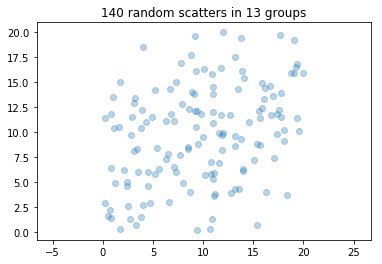

In [405]:
# Making random points

a1_x = np.random.uniform(3,17,randomPointsInEveryGroup)
a1_y = np.random.uniform(3,17,randomPointsInEveryGroup)
a2_x = np.random.uniform(0,13,randomPointsInEveryGroup)
a2_y = np.random.uniform(0,13,randomPointsInEveryGroup)
a3_x = np.random.uniform(7,20,randomPointsInEveryGroup)
a3_y = np.random.uniform(7,20,randomPointsInEveryGroup)
r4_x = np.random.uniform(0,20,randomPointsInEveryGroup)
r4_y = np.random.uniform(0,20,randomPointsInEveryGroup)

a_x = np.r_[a1_x, a2_x, a3_x, r4_x].reshape(-1,1)
a_y = np.r_[a1_y, a2_y, a3_y, r4_y].reshape(-1,1)
points = np.hstack((a_x, a_y))

plt.title(str(scatters) + " random scatters in "+ str(groups) + " groups")
plt.plot(a_x, a_y, 'o', alpha=0.3)
plt.axis('equal')
plt.show()


In [406]:
# Logic finding central points & lines

# Initial calculation
distances = scipy.spatial.distance_matrix(points, points)

linkLines = np.array([])        
for x in range(scatters):
    i = indexes[np.argmin(distances[x][indexes])]
    linkLines = np.append(linkLines, np.r_[points[x], points[i]])
linkLines = linkLines.reshape(-1, 4)

centres = np.array([])
for i in indexes:
    group = linkLines[np.where(linkLines[:,2] == points[i][0])]
    centres = np.append(centres, group.mean(0))
centres = centres.reshape(-1,4)

groupsCentres = np.hstack((centres[:,[0]], centres[:,[1]])).reshape(-1,2)

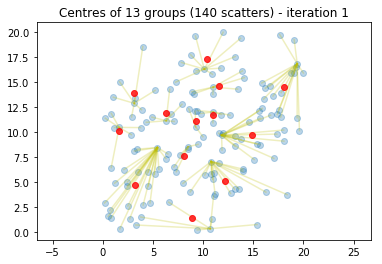

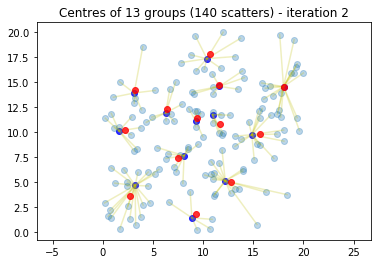

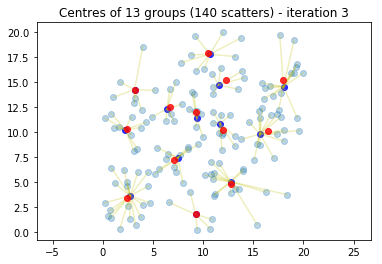

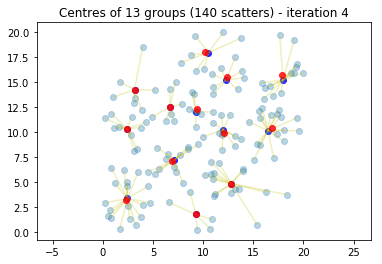

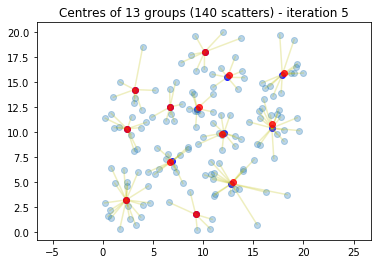

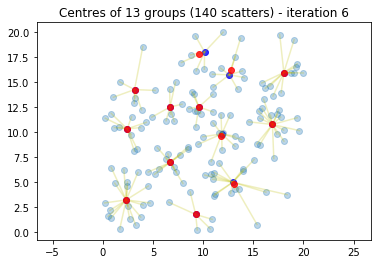

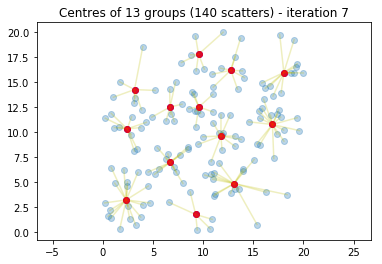

In [407]:
import time
iteration = 1

# Plotting task No. 1
plt.title("Centres of " + str(groups) + " groups (" + str(scatters) + " scatters) - iteration " + str(iteration))
plt.plot(a_x, a_y, 'o', alpha=0.3)
plt.plot(np.r_[linkLines[:,0], linkLines[:,2]].reshape(-1,scatters),
         np.r_[linkLines[:,1], linkLines[:,3]].reshape(-1,scatters), 'y-', alpha=0.25)
# for i in range(points.shape[0]):
#     plt.text(points[i,0], points[i,1], str(i), alpha=0.5)

plt.plot(centres[:,0], centres[:,1], 'ro', alpha=0.8)

plt.axis('equal')
plt.show()

# Plotting tasks No. 2 - ...
doIterate = True
while (doIterate):
    
    plt.plot(groupsCentres[:,0], groupsCentres[:,1], 'bo', alpha=0.8)
    
    distances2 = scipy.spatial.distance_matrix(points, groupsCentres)
    
    linkLines2 = np.array([])
    for i in range(len(distances2)):
        i_min = np.argmin(distances2[i])
        linkLines2 = np.append(linkLines2, np.r_[points[i], groupsCentres[i_min]])
    linkLines2 = linkLines2.reshape(-1, 4)
    
    centres2 = np.array([])
    for i in range(len(groupsCentres)):
        group = linkLines2[np.where(linkLines2[:,2] == groupsCentres[i][0])]
        centres2 = np.append(centres2, group.mean(0))
    centres2 = centres2.reshape(-1,4)
    
    matchVectors = np.hstack((np.abs(np.r_[centres2[:,[2]] - centres2[:,[0]]]) < 0.001,
                              np.abs(np.r_[centres2[:,[2]] - centres2[:,[0]]]) < 0.001))
    doIterate= ~np.all(matchVectors)
    iteration += 1
    groupsCentres = np.hstack((centres2[:,[0]], centres2[:,[1]])).reshape(-1,2)
    
    plt.title("Centres of " + str(groups) + " groups (" + str(scatters) + " scatters) - iteration " + str(iteration))
    plt.plot(a_x, a_y, 'o', alpha=0.3)
    plt.plot(np.r_[linkLines2[:,0], linkLines2[:,2]].reshape(-1,scatters),
             np.r_[linkLines2[:,1], linkLines2[:,3]].reshape(-1,scatters), 'y-', alpha=0.25)
    plt.plot(centres2[:,0], centres2[:,1], 'ro', alpha=0.8)
    plt.axis('equal')
    plt.show()
    
    time.sleep(3)
    